<a href="https://colab.research.google.com/github/HectorGM13/Data-Analysis-Machine-Learning/blob/main/ProyectoHGM_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Leyendo el archivo y explorando la tabla

In [91]:
WQ_df = pd.read_csv('/content/drive/MyDrive/WQ.csv')
WQ_df.head()

,acidez_fija,acidez_volatil,acidez_citrica,azucar_residual,cloruros,so2_libre,so2_total,densidad,ph,sulfatos,alcohol,calidad,tipo
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,tinto
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,tinto
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,tinto
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,tinto
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,tinto


In [92]:
WQ_df.tail()

,acidez_fija,acidez_volatil,acidez_citrica,azucar_residual,cloruros,so2_libre,so2_total,densidad,ph,sulfatos,alcohol,calidad,tipo
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,blanco
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,blanco
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,blanco
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,blanco
6496,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,blanco


In [93]:
#Separando los tipos de vino
blanco_df = WQ_df.loc[(WQ_df["tipo"] == "blanco")]

tinto_df = WQ_df.loc[(WQ_df["tipo"] == "tinto")]

Agrupando por niveles de calidad

In [94]:
red_Q=tinto_df.sort_values(by="calidad", ascending=True)
red_Q.head()

,acidez_fija,acidez_volatil,acidez_citrica,azucar_residual,cloruros,so2_libre,so2_total,densidad,ph,sulfatos,alcohol,calidad,tipo
1478,7.1,0.875,0.05,5.7,0.082,3.0,14.0,0.99808,3.40,0.52,10.2,3,tinto
832,10.4,0.440,0.42,1.5,0.145,34.0,48.0,0.99832,3.38,0.86,9.9,3,tinto
899,8.3,1.020,0.02,3.4,0.084,6.0,11.0,0.99892,3.48,0.49,11.0,3,tinto
1374,6.8,0.815,0.00,1.2,0.267,16.0,29.0,0.99471,3.32,0.51,9.8,3,tinto
459,11.6,0.580,0.66,2.2,0.074,10.0,47.0,1.00080,3.25,0.57,9.0,3,tinto


In [95]:
white_Q=blanco_df.sort_values(by="calidad", ascending=True)
white_Q.tail()

,acidez_fija,acidez_volatil,acidez_citrica,azucar_residual,cloruros,so2_libre,so2_total,densidad,ph,sulfatos,alcohol,calidad,tipo
2373,9.1,0.27,0.45,10.6,0.035,28.0,124.0,0.99700,3.20,0.46,10.4,9,blanco
2426,7.4,0.24,0.36,2.0,0.031,27.0,139.0,0.99055,3.28,0.48,12.5,9,blanco
2475,6.9,0.36,0.34,4.2,0.018,57.0,119.0,0.98980,3.28,0.36,12.7,9,blanco
2419,6.6,0.36,0.29,1.6,0.021,24.0,85.0,0.98965,3.41,0.61,12.4,9,blanco
3204,7.1,0.26,0.49,2.2,0.032,31.0,113.0,0.99030,3.37,0.42,12.9,9,blanco


Para darnos una idea del tamaño de los conjuntos de blanco y tinto

In [8]:

red_Q.groupby('calidad').size()

calidad
3     10
4     53
5    681
6    638
7    199
8     18
dtype: int64

In [9]:
white_Q.groupby('calidad').size()

calidad
3      20
4     163
5    1457
6    2198
7     880
8     175
9       5
dtype: int64

Los grupos son diferentes en tamaño, blanco es mucho más grande que tinto. 

Vamos ahora a agrupar los datos por calidad y a obtener valores promedio para cada nivel de calidad. Esto ayudará a explorar qué caracteristicas son más interesantes para determinar la calidad de un vino.

In [84]:
red_Q.groupby('calidad').mean()

,acidez_fija,acidez_volatil,acidez_citrica,azucar_residual,cloruros,so2_libre,so2_total,densidad,ph,sulfatos,alcohol
calidad,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


In [11]:
white_Q.groupby('calidad').mean()

,acidez_fija,acidez_volatil,acidez_citrica,azucar_residual,cloruros,so2_libre,so2_total,densidad,ph,sulfatos,alcohol
calidad,,,,,,,,,,,
3,7.600000,0.333250,0.336000,6.392500,0.054300,53.325000,170.600000,0.994884,3.187500,0.474500,10.345000
4,7.129448,0.381227,0.304233,4.628221,0.050098,23.358896,125.279141,0.994277,3.182883,0.476135,10.152454
5,6.933974,0.302011,0.337653,7.334969,0.051546,36.432052,150.904598,0.995263,3.168833,0.482203,9.808840
6,6.837671,0.260564,0.338025,6.441606,0.045217,35.650591,137.047316,0.993961,3.188599,0.491106,10.575372
7,6.734716,0.262767,0.325625,5.186477,0.038191,34.125568,125.114773,0.992452,3.213898,0.503102,11.367936
8,6.657143,0.277400,0.326514,5.671429,0.038314,36.720000,126.165714,0.992236,3.218686,0.486229,11.636000
9,7.420000,0.298000,0.386000,4.120000,0.027400,33.400000,116.000000,0.991460,3.308000,0.466000,12.180000


In [12]:
redQ = red_Q.groupby('calidad').mean()
whiteQ = white_Q.groupby('calidad').mean()

Gráficas comparativas

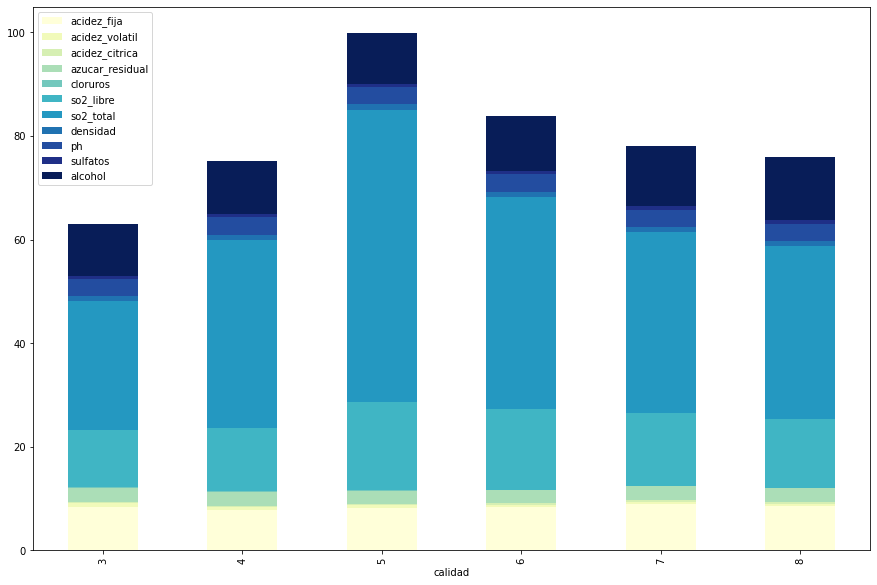

In [13]:
red_Q.groupby(["calidad"]).mean().plot.bar(
    stacked=True, cmap="YlGnBu", figsize=(15, 10)
)

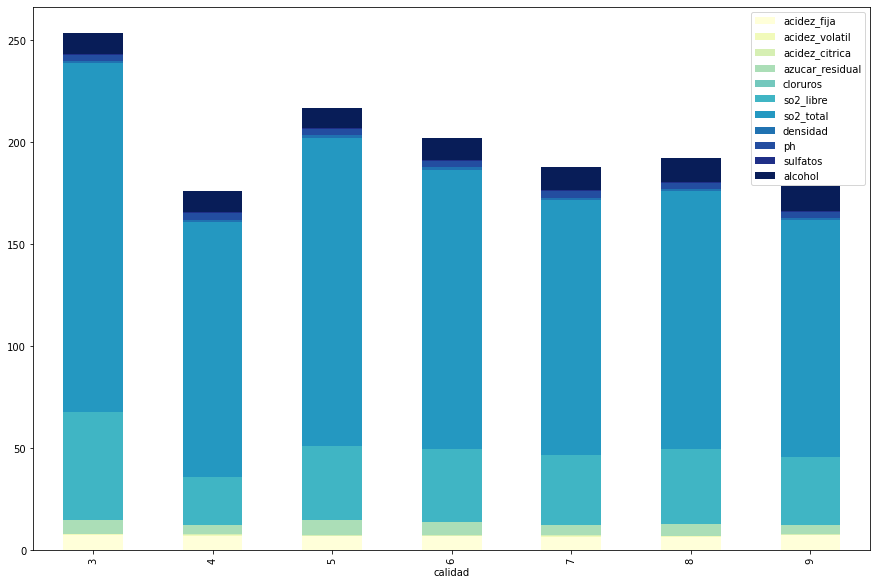

In [14]:
white_Q.groupby(["calidad"]).mean().plot.bar(
    stacked=True, cmap="YlGnBu", figsize=(15, 10)
)

Las gráficas anteriores no dan mucha información, si comparamos algunos parámetros quizá encontremos tendencias más interesantes. 

Hacemos boxplot y señalamos la media con una linea amarilla

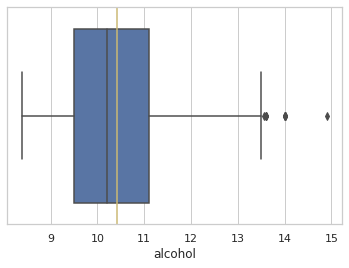

In [ ]:
sns.set(style="whitegrid")
sns.boxplot(x=tinto_df['alcohol'])
plt.axvline(tinto_df['alcohol'].mean(), c='y')

Hacemos histograma

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0, 0.5, 'densidad'),
 Text(0.5, 0, 'alcohol'),
 Text(0.5, 1.0, 'densidad de alcohol para tinto')]

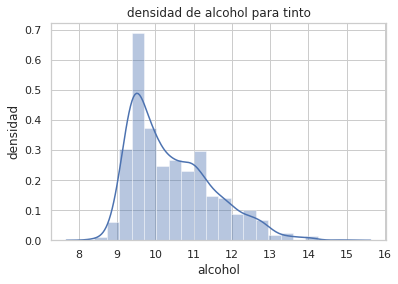

In [ ]:
ax=sns.distplot(tinto_df['alcohol'], kde=True, norm_hist=False, bins=20)
ax.set(title='densidad de alcohol para tinto', xlabel='alcohol', ylabel='densidad')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


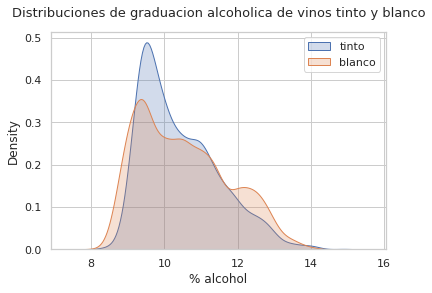

In [ ]:
ax = sns.distplot(red_Q['alcohol'], hist=False, kde_kws = {'shade': True}, label='tinto')
sns.distplot(white_Q['alcohol'], hist=False, kde_kws = {'shade': True}, ax=ax, label='blanco')
ax.set_title('Distribuciones de graduacion alcoholica de vinos tinto y blanco', fontsize=13, pad=15);
ax.set(xlabel='% alcohol');
ax.legend(loc='upper right');

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


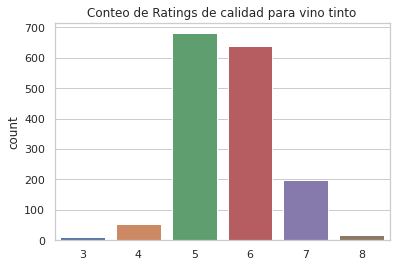

In [ ]:
countR = red_Q['calidad'].value_counts()
ax = sns.barplot(countR.index, countR)
ax.set_title('Conteo de Ratings de calidad para vino tinto')
ax.set(ylabel='count');

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


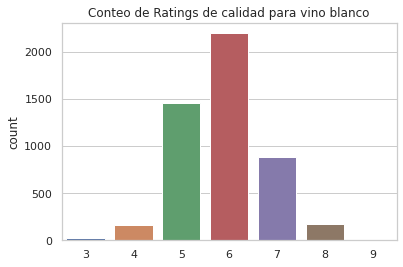

In [ ]:
countW = white_Q['calidad'].value_counts()
ax = sns.barplot(countW.index, countW)
ax.set_title('Conteo de Ratings de calidad para vino blanco')
ax.set(ylabel='count');

Bootstrapping

In [ ]:
Alcohol = red_Q['alcohol']

means = []

for i in range(100_000):
    sample = Alcohol.sample(n=50, replace=True)
    means.append(sample.mean())
    
serie_means = pd.Series(means)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


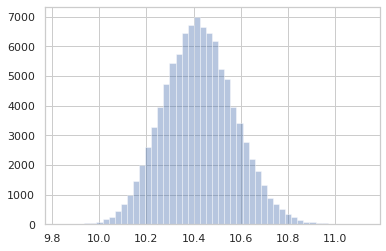

In [ ]:
sns.distplot(serie_means, kde=False, norm_hist=False);

In [ ]:
serie_means.skew()

0.1291586062459124

In [ ]:
serie_means.kurtosis()

0.032160701062427854

In [ ]:
print(f'Error estandar: {serie_means.std()}')

Error estandar: 0.1504852742438055


Evaluamos coeficientes de correlación y agregamos mapas de calor para apreciar de manera más efectiva las correlaciones. 

In [ ]:
red_Q.corr()

,acidez_fija,acidez_volatil,acidez_citrica,azucar_residual,cloruros,so2_libre,so2_total,densidad,ph,sulfatos,alcohol,calidad
acidez_fija,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
acidez_volatil,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
acidez_citrica,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
azucar_residual,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
cloruros,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
so2_libre,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
so2_total,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
densidad,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
ph,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulfatos,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [ ]:
white_Q.corr()

,acidez_fija,acidez_volatil,acidez_citrica,azucar_residual,cloruros,so2_libre,so2_total,densidad,ph,sulfatos,alcohol,calidad
acidez_fija,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
acidez_volatil,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
acidez_citrica,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
azucar_residual,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
cloruros,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
so2_libre,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
so2_total,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
densidad,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
ph,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulfatos,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


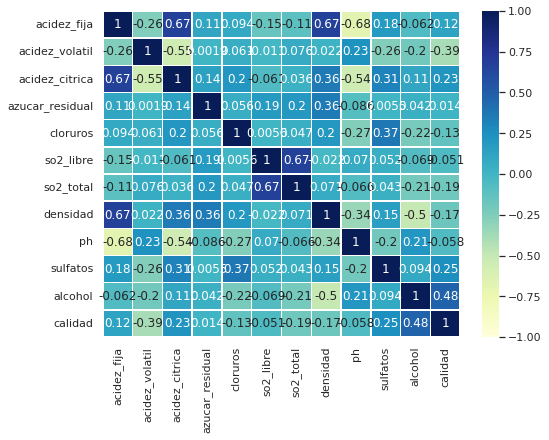

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.heatmap(red_Q.corr(), vmin=-1, vmax=1, annot=True, cmap="YlGnBu", linewidths=.5);

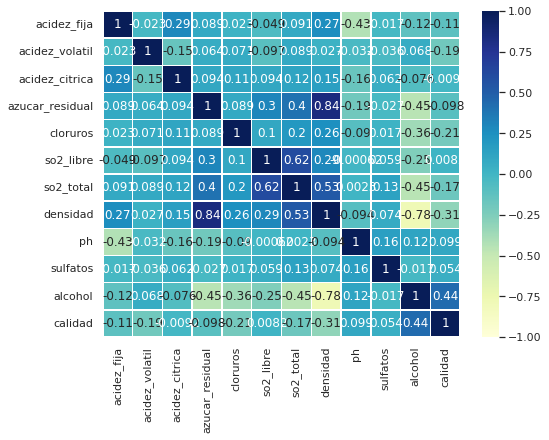

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.heatmap(white_Q.corr(), vmin=-1, vmax=1, annot=True, cmap="YlGnBu", linewidths=.5);

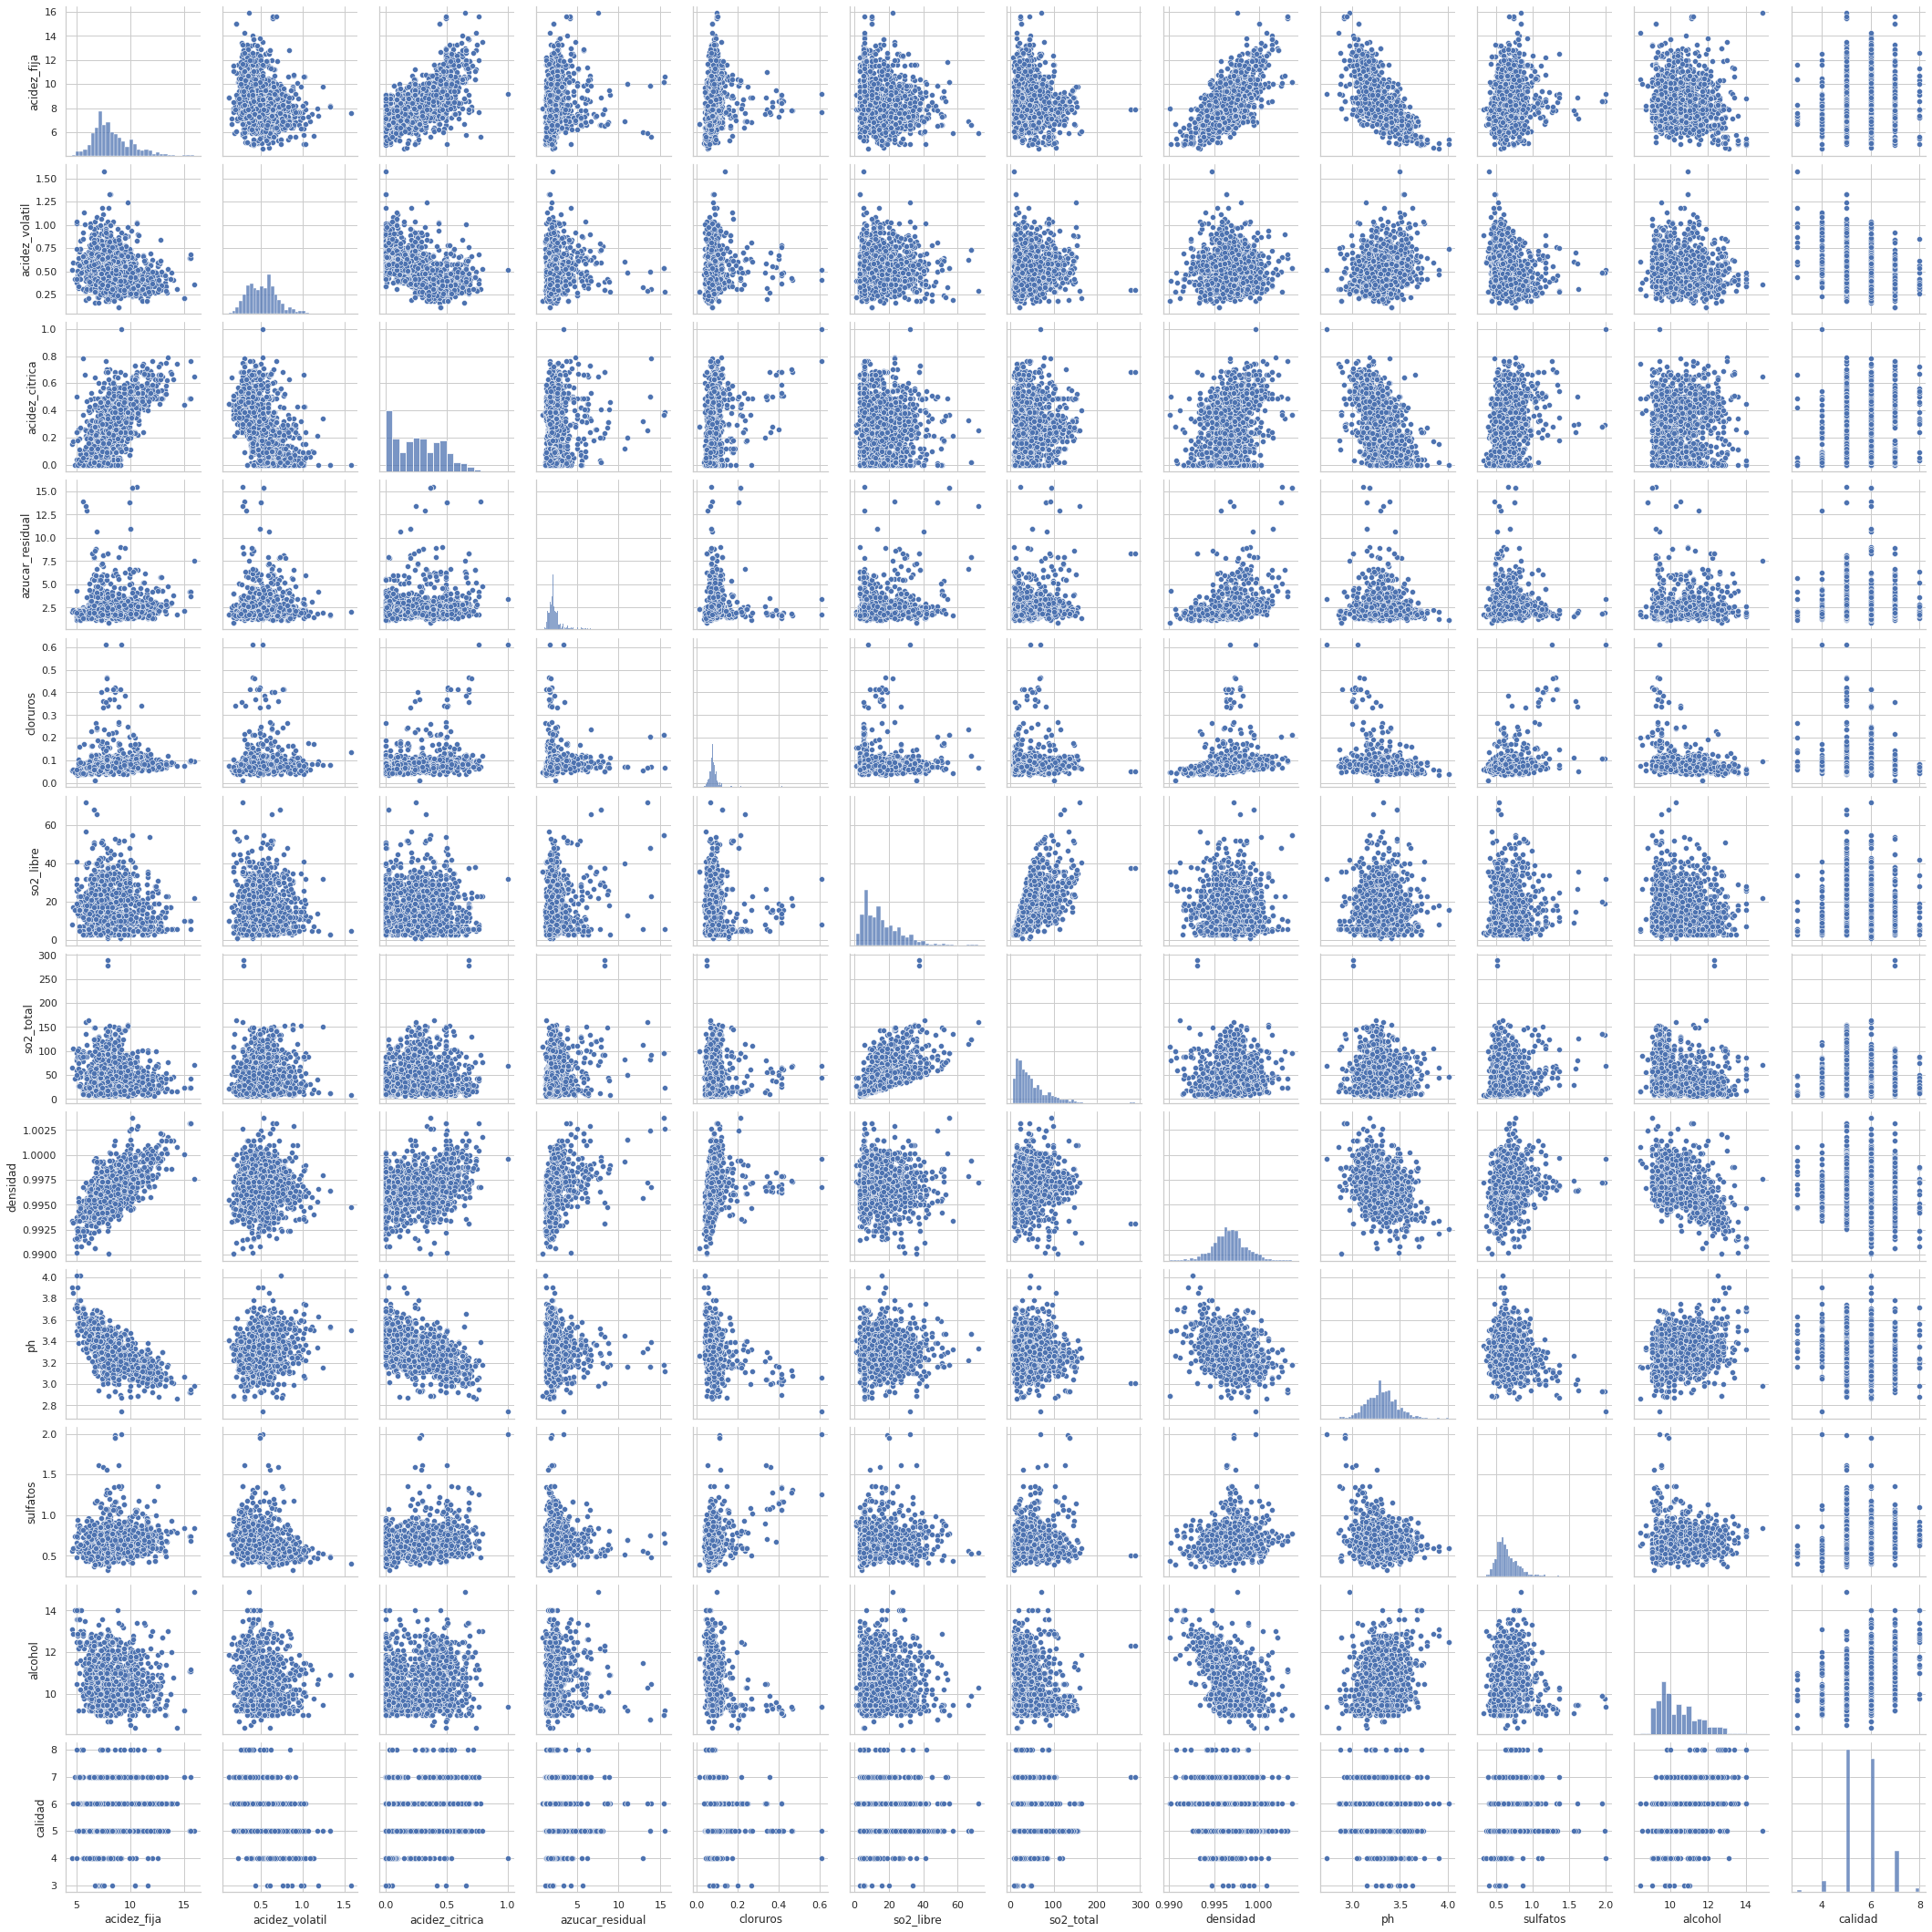

In [ ]:
sns.pairplot(red_Q);

Quitamos los datos que no muestran una correlación util. 

In [ ]:
drop_red = red_Q.drop(columns=['acidez_fija','so2_libre','ph','so2_total','densidad','sulfatos','azucar_residual'])

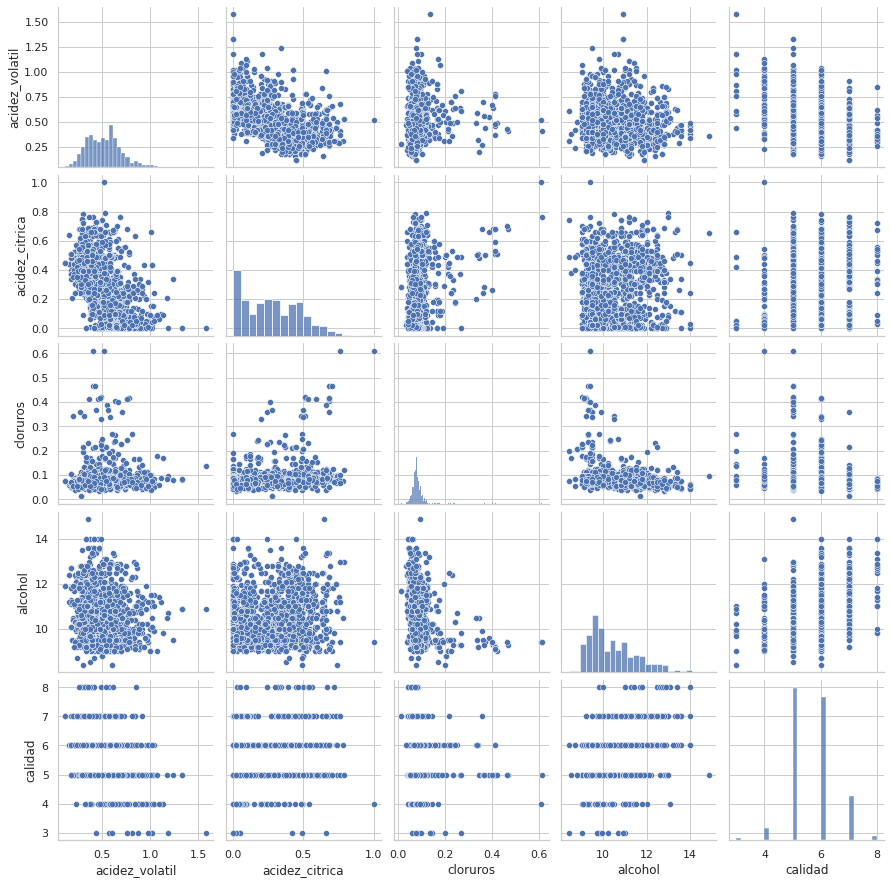

In [ ]:
sns.pairplot(drop_red);

Vamos a explorar algunos pares de variables a ver si encontramos relaciones interesantes. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0.98, 'Relacion Alcohol Vs Acidez Volatil para Vino Tinto')

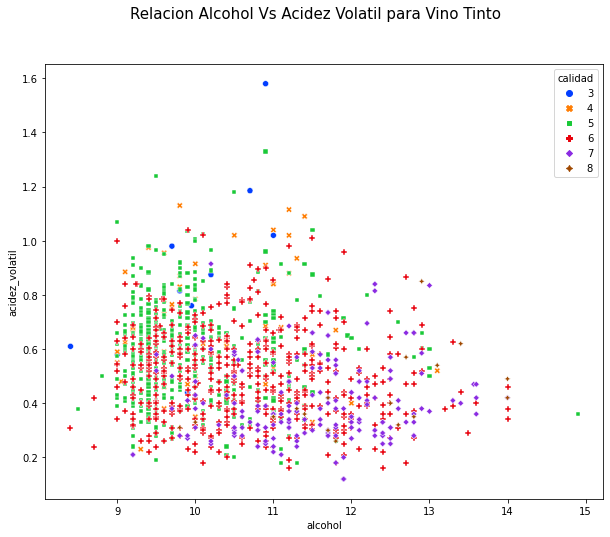

In [15]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot()
sns.scatterplot(red_Q['alcohol'], red_Q['acidez_volatil'], hue=red_Q['calidad'], style=red_Q['calidad'], palette="bright", ax=ax);
fig.suptitle('Relacion Alcohol Vs Acidez Volatil para Vino Tinto', fontsize=15)


En el caso de Alcohol y Ac. Volátil, puede verse que menor acidez volátil y mayor grado alcóholico implican mejor percepción de calidad. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0.98, 'Relacion Alcohol Vs Acidez Cítrica para Vino Tinto')

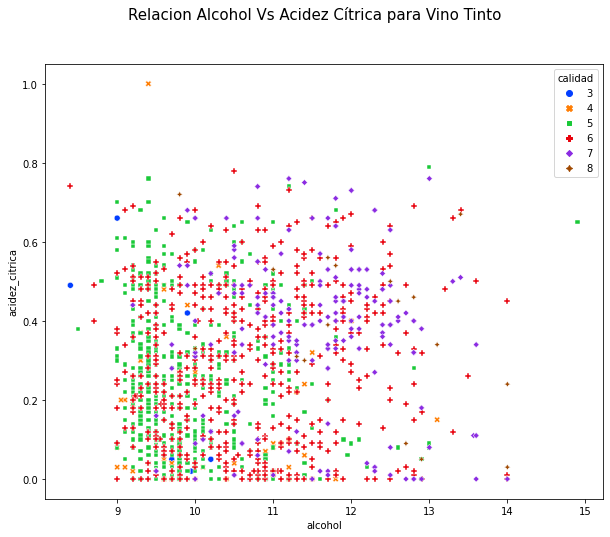

In [16]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot()
sns.scatterplot(red_Q['alcohol'], red_Q['acidez_citrica'], hue=red_Q['calidad'], style=red_Q['calidad'], palette="bright", ax=ax);
fig.suptitle('Relacion Alcohol Vs Acidez Cítrica para Vino Tinto', fontsize=15)

Para el caso de la Ac. Cítrica es lo opuesto que con la Ac. Volátil. Mayor Ac. Cítrica implica mejor percepción de calidad. 

Machine Learning

Regresión Lineal Múltiple

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


Usaremos nivel de alcohol y acidez volatil para intentar predecir calidad del vino. 

In [18]:
X = white_Q[['alcohol', 'acidez_volatil']]
y = white_Q['calidad']

In [19]:
X_training, X_test, y_training, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
lin_model = LinearRegression()
lin_model.fit(X_training, y_training)

LinearRegression()

In [22]:
y_train_predict = lin_model.predict(X_training)
MSE = mean_squared_error(y_training,y_train_predict)
print("Entrenamiento: MSE ="+str(MSE))

y_test_predict = lin_model.predict(X_test)
MSE = (mean_squared_error(y_test, y_test_predict))
print("Pruebas: MSE ="+str(MSE))

Entrenamiento: MSE =0.5798379113806907
Pruebas: MSE =0.6331049398961067


In [23]:
lin_model.score(X_test, y_test)

0.23130068419321315

In [24]:
lr_2 = LinearRegression()
lr_2.fit(X, y)

LinearRegression()

In [25]:
lr_2.score(X, y)

0.24023118475477112

Ahora, veamos que tal predijo nuestro modelo poniendo lado a lado las predicciones y los valores reales

In [26]:
df_predicciones = pd.DataFrame({'valor_real':y_test, 'prediccion':y_test_predict})
df_predicciones = df_predicciones.reset_index(drop = True)
df_predicciones.head(10)

,valor_real,prediccion
0,7,5.800255
1,6,5.332675
2,6,5.834128
3,5,6.166006
4,7,6.376728
5,3,5.444062
6,6,5.877770
7,6,5.971243
8,6,6.090445
9,5,5.906323


La correlación para regresión lineal es muy baja, veamos si mejora con regresión polinomial.

In [27]:
from sklearn.preprocessing import PolynomialFeatures

In [28]:
poly_model = LinearRegression()
poly = PolynomialFeatures(degree=3)

Xpolytrain = poly.fit_transform(X_training)
Xpolytest = poly.fit_transform(X_test)

poly_model.fit(Xpolytrain, y_training)
y_train_predict = poly_model.predict(Xpolytrain)

MSE = mean_squared_error(y_training,y_train_predict)
print("Entrenamiento: MSE ="+str(MSE))

y_test_predict = poly_model.predict(Xpolytest)
MSE = (mean_squared_error(y_test, y_test_predict))
print("Pruebas: MSE ="+str(MSE))

df_predicciones = pd.DataFrame({'valor_real':y_test, 'prediccion':y_test_predict, 'diferencia':y_test-y_test_predict})
df_predicciones = df_predicciones.reset_index(drop = True)
df_predicciones.head(10)

Entrenamiento: MSE =0.554023908541779
Pruebas: MSE =0.6087156762108203


,valor_real,prediccion,diferencia
0,7,5.930386,1.069614
1,6,5.234410,0.765590
2,6,5.671238,0.328762
3,5,6.127947,-1.127947
4,7,6.621643,0.378357
5,3,5.304342,-2.304342
6,6,5.898005,0.101995
7,6,5.846404,0.153596
8,6,5.986787,0.013213
9,5,5.759940,-0.759940


Intentemos ahora usar otras técnicas de Machine Learning para ver si se adaptan mejor a los datos. 

In [34]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

Definiendo las variables a evaluar

In [97]:
x = red_Q[['alcohol', 'acidez_volatil']]
y = red_Q['calidad']

Añadiendo matriz de entrenamiento

In [98]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.31, shuffle=True)

Implementando Random Forests

In [99]:
from sklearn.ensemble import RandomForestClassifier
RandomForest = RandomForestClassifier(n_estimators = 950)
RandomForest.fit(x_train, y_train)
y_pred_rfc = RandomForest.predict(x_test)

In [100]:
RFC = confusion_matrix(y_test, y_pred_rfc)
print(RFC)

[[  0   1   2   0   0   0]
 [  1   2   6   6   1   0]
 [  1   5 168  51   5   1]
 [  0   5  62  99  20   1]
 [  0   0   1  25  25   2]
 [  0   0   0   5   1   0]]


In [101]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.15      0.12      0.14        16
           5       0.70      0.73      0.71       231
           6       0.53      0.53      0.53       187
           7       0.48      0.47      0.48        53
           8       0.00      0.00      0.00         6

    accuracy                           0.59       496
   macro avg       0.31      0.31      0.31       496
weighted avg       0.58      0.59      0.59       496



Implementando Redes Neuronales Artificiales

In [102]:
from sklearn.neural_network import MLPClassifier
NeuralNetwork = MLPClassifier(hidden_layer_sizes=(70,30),
                            max_iter=20000,
                            activation ='logistic',
                            tol= 1e-8)

NeuralNetwork.fit(x_train, y_train)
y_pred_nn = NeuralNetwork.predict(x_test)

In [103]:
NN = confusion_matrix(y_test, y_pred_nn)
print(NN)

[[  0   0   3   0   0   0]
 [  0   0  14   2   0   0]
 [  0   0 180  51   0   0]
 [  0   0  76 105   6   0]
 [  0   0   4  40   9   0]
 [  0   0   0   3   3   0]]


In [104]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_nn))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        16
           5       0.65      0.78      0.71       231
           6       0.52      0.56      0.54       187
           7       0.50      0.17      0.25        53
           8       0.00      0.00      0.00         6

    accuracy                           0.59       496
   macro avg       0.28      0.25      0.25       496
weighted avg       0.55      0.59      0.56       496



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Implementando Máquina de Soporte Vectorial

In [105]:
from sklearn.svm import SVC #Support Vector Classifier
from sklearn.pipeline import make_pipeline

In [106]:
SupportVectorMachine = SVC()
SupportVectorMachine.fit(x_train, y_train) 
y_pred_svc = SupportVectorMachine.predict(x_test) 

In [107]:
SVC = confusion_matrix(y_test, y_pred_svc)
print(SVC)

[[  0   0   3   0   0   0]
 [  0   0   7   9   0   0]
 [  0   0 184  47   0   0]
 [  0   0  85 102   0   0]
 [  0   0   7  46   0   0]
 [  0   0   2   4   0   0]]


In [108]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        16
           5       0.64      0.80      0.71       231
           6       0.49      0.55      0.52       187
           7       0.00      0.00      0.00        53
           8       0.00      0.00      0.00         6

    accuracy                           0.58       496
   macro avg       0.19      0.22      0.20       496
weighted avg       0.48      0.58      0.52       496



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Implementando Naïve Bayes

In [109]:
from sklearn.naive_bayes import GaussianNB

In [110]:
NaiveBayes = GaussianNB()
NaiveBayes.fit(x_train, y_train) 
y_pred_nb = NaiveBayes.predict(x_test) 

In [111]:
NB = confusion_matrix(y_test, y_pred_nb)
print(NB)

[[  1   0   2   0   0   0]
 [  0   3  11   2   0   0]
 [  0   0 183  48   0   0]
 [  0   1  84  87  15   0]
 [  0   0   5  30  18   0]
 [  0   0   0   3   3   0]]


In [112]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           3       1.00      0.33      0.50         3
           4       0.75      0.19      0.30        16
           5       0.64      0.79      0.71       231
           6       0.51      0.47      0.49       187
           7       0.50      0.34      0.40        53
           8       0.00      0.00      0.00         6

    accuracy                           0.59       496
   macro avg       0.57      0.35      0.40       496
weighted avg       0.58      0.59      0.57       496



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
